# EXERCISE
In this exercise you will write the key components of both a Q-learning and SARSA agent and train them to solve the frozen lake environment: https://www.gymlibrary.dev/environments/toy_text/frozen_lake/  

In [2]:
import gym
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath("")))
from utils_nt import plot_value, plot_returns, plot_explore

import numpy as np
import matplotlib.pyplot as plt
import math

## Training loop
Try and understand roughly how this code works:
* Where is the agents policy queried to get the next action?
* Where is the action applied to the environment?
* Where is the state, action, reward, next_state, next_action constructed?
* Which block of code runs an entire episode?
* Find where the different agents are updated, why is monte-carlo agent updated in a different place in the code?

In [4]:
def train_agent(agent, env,  n_episodes = 10001, explore_rate = 0.05, monte_carlo = False, display=False):

    returns = []
    
    for episode in range(0,n_episodes): # for each episode

        e_return = 0 # sum the reward we get this episode
        e_transitions = [] # memory of all tranisitions seen in this episode
        done = False # has the episode finished?
        
        state = env.reset() # reset env to initial state
        
        action = agent.epsilon_greedy_policy(state, explore_rate) # initialise the agent

        if display: # display the current agent-evironment state
            env.render(mode='human')
        
        explore_rate = agent.get_explore_rate(episode, n_episodes/11)
        while not done: # run the episode until a terminal state reached

            next_state, reward, done, info = env.step(action) # take an action and get the resulting state from the env
            next_action = agent.epsilon_greedy_policy(next_state, explore_rate) # get the next action to apply from agent's policy
            transition = (state, action, reward, next_state, next_action, done) # create the SARSA transition
            e_transitions.append(transition) # add to the memory

            if not monte_carlo: # update the Q function of temporal difference agents
                agent.update_Q(transition)

            state = next_state
            action = next_action

            e_return += reward
            
            if display: # display the current agent-evironment state
                env.render(mode='human')


        returns.append(e_return)
        
        if monte_carlo: # update the q function of a monte carlo agent
            agent.update_Q(e_transitions)

        if episode % 1000 == 0: # print results of current episode
            print('episode:', episode, ', explore_rate:', explore_rate, ', return:', e_return)
            
    return returns

# 1. Fill in the Q learning agent's policy and update function 
You will need to:
- Initialise the Q_func. Create a numpy array full of zeros which will store the values for all the state-action pairs. 
- Write code for the epsilon greedy policy. Use the np.random.random function to determine whether the agent should take a random exploratory action with the explore_rate. If an exploratory action is taken, choose an action randomly from the set of available actions using the np.random.choice function. If we instead take a exploitative action use the np.argmax function to take the action with the highest value given the current state. 
- Write code for the update_Q function. This should increment the Q_func for the current state-action pair according to the Q-learning update rule.

If you get stuck the code examples in the slides will help

In [22]:
class Q_agent():

    def __init__(self, n_states, n_actions, gamma = 0.95, alpha = 0.01):

        self.gamma = gamma
        self.alpha = alpha
        self.n_states = n_states
        self.n_actions = n_actions
        
       
        # ******* Your code here *******
        self.Q_func = np.zeros((n_states, n_actions))        


    def epsilon_greedy_policy(self, state, explore_rate):
        if np.random.random() > explore_rate:
            Q = {state: [0, 1, 2, 3]}
            action = np.argmax(self.Q_func[state])
        else:
            action = np.random.choice(range(self.n_actions))
        return action 
        
        '''
        action = agent.epsilon_greedy_policy(state, explore_rate)
        chooses an action based on the agents value function and the current explore rate
        :param state: the current state given by the environment
        :param explore_rate: the chance of taking a random action
        return action 
        '''
        # ******* Your code here *******
        #
        ####
    
    def update_Q(self,transition):
        
        state, action, reward, next_state, next_action, done = transition
        self.Q_func[state, action]= self.Q_func[state, action]+ self.alpha*(reward+ self.gamma* np.max(self.Q_func[next_state])*(1-done)- self.Q_func[state, action])
        
        
        
    def get_explore_rate(self, episode, decay, min_r = 0, max_r = 1):
        '''
        Calculates the logarithmically decreasing explore or learning rate

        Parameters:
            episode: the current episode
            min_r: the minimum possible step size
            max_r: maximum step size
            decay: controls the rate of decay of the step size
        Returns:
            step_size: the Q-learning step size
        '''

        rate = max(min_r, min(max_r, 1.0 - math.log10((episode + 1) / decay)))

        return rate

    

## 2. Train the Q learning agent
Train and test the Q_learning agent using the code below

Examine the output plots:
- Do the output plots indicate that you agent has been trained sucessfully
- Has it found the optimal policy? If not try and debug. 

In [32]:
# train the agent 

env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False)
env.render_mode = 'human'

# ******* Your code here *******
# Fill in these variables, look at the OpenAIGym documentation to find the correct values 
n_states = 64
n_actions = 4
grid_shape = '8x8'

p_map = {0:'L', 1:'D', 2:'R', 3:'U'}

agent = Q_agent(n_states, n_actions)
n_episodes = 50001

print('TRAINING')
returns = train_agent(agent, env, n_episodes = n_episodes, explore_rate = 0.05) # train the agent
    

TRAINING
episode: 0 , explore_rate: 1 , return: 0.0
episode: 1000 , explore_rate: 1 , return: 0.0
episode: 2000 , explore_rate: 1 , return: 0.0
episode: 3000 , explore_rate: 1 , return: 0.0
episode: 4000 , explore_rate: 1 , return: 0.0
episode: 5000 , explore_rate: 0.9585291504329063 , return: 0.0
episode: 6000 , explore_rate: 0.8793623782144776 , return: 0.0
episode: 7000 , explore_rate: 0.8124259273286283 , return: 1.0
episode: 8000 , explore_rate: 0.7544417345710356 , return: 0.0
episode: 9000 , explore_rate: 0.7032952432794471 , return: 0.0
episode: 10000 , explore_rate: 0.6575425777037114 , return: 0.0
episode: 11000 , explore_rate: 0.616153840300309 , return: 0.0
episode: 12000 , explore_rate: 0.5783685692340073 , return: 1.0
episode: 13000 , explore_rate: 0.5436092466907276 , return: 1.0
episode: 14000 , explore_rate: 0.5114269493757557 , return: 0.0
episode: 15000 , explore_rate: 0.4814657939244886 , return: 0.0
episode: 16000 , explore_rate: 0.45343887976772645 , return: 1.0
e

In [33]:
# Run a test episode
print()
print('TEST EPISODE')
r = train_agent(agent, env, n_episodes=1, explore_rate=0, display=True) # run a test episode to get the learned behaviour with no exploring



TEST EPISODE

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFF

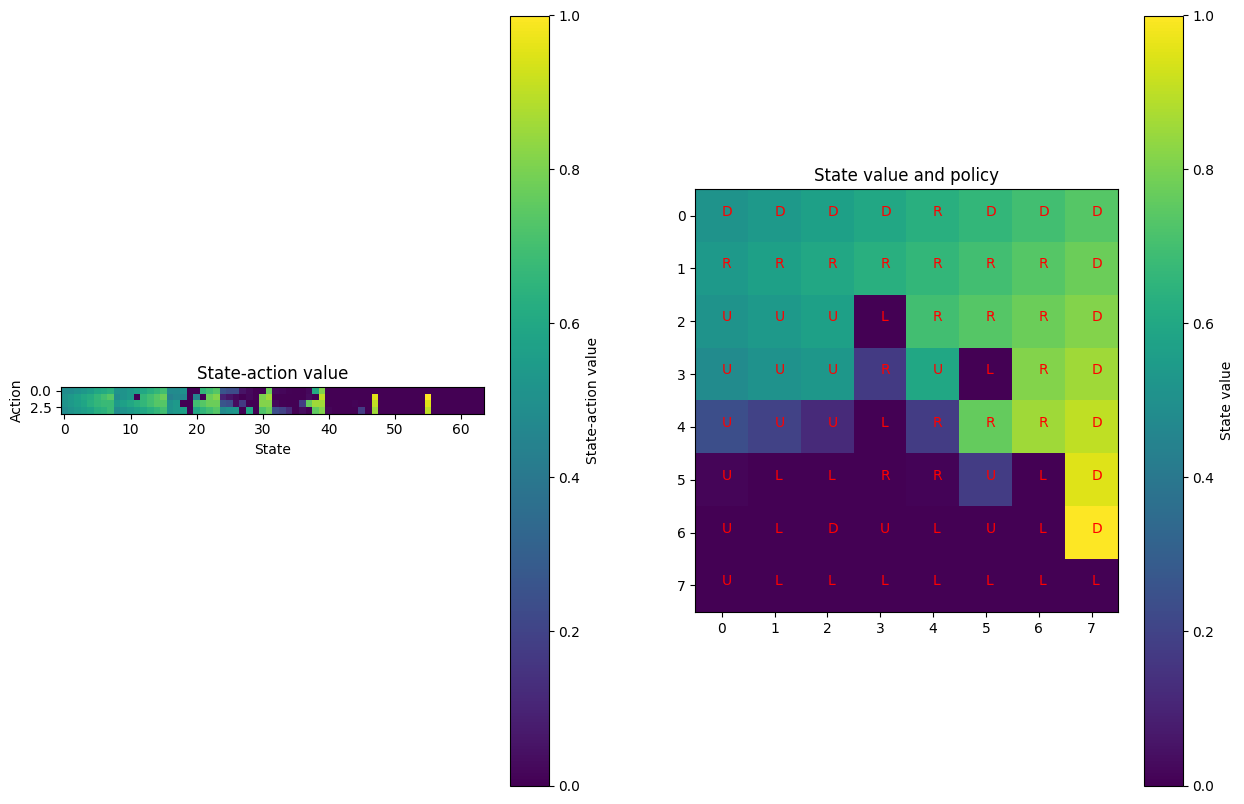

In [35]:
# plot the value function and policy
plot_value(agent.Q_func, (8,8), p_map) 


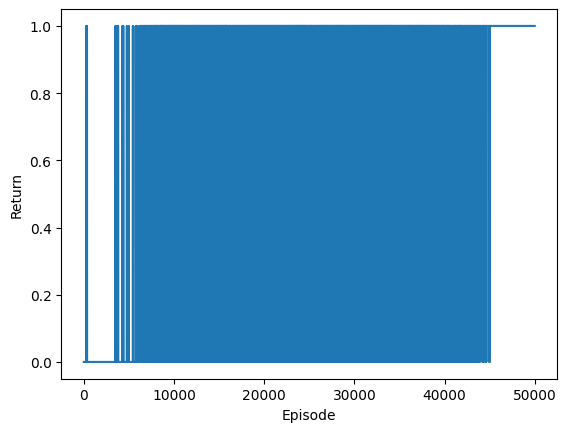

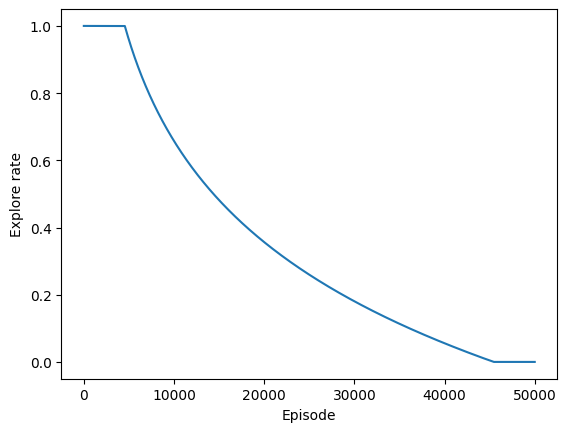

In [36]:
# plot returns and explore rate 
plot_returns(returns)
plot_explore(agent.get_explore_rate, n_episodes)

# 3. Now create a  SARSA_agent. 
- Hint: the initialisation and the policy functions will be the same as the Q_agent, just change the update_Q function to increment the Q_func for the current state-action pair according to the SARSA update rule.


In [20]:
class SARSA_agent():

    def __init__(self, n_states, n_actions, gamma = 0.95, alpha = 0.01):

        self.gamma = gamma
        self.alpha = alpha
        self.n_states = n_states
        self.n_actions = n_actions
        
        # THIS WILL BE THE SAME AS THE Q_agent
        # ******* Your code here ******* 
        self.Q_func = np.zeros((n_states, n_actions))
        

        
    def epsilon_greedy_policy(self, state, explore_rate):
        if np.random.random() > explore_rate:
            Q = {state: [0, 1, 2, 3]}
            action = np.argmax(self.Q_func[state])
        else:
            action = np.random.choice(range(self.n_actions))
        return action 


    
    def update_Q(self,transition):
        state, action, reward, next_state, next_action, done = transition
        #𝑄( 𝑠𝑡,𝑎𝑡 )=𝑄( 𝑠𝑡,𝑎𝑡 )+𝛼(𝑟𝑡+𝛾 𝑄(𝑠𝑡+1,𝑎𝑡+1)−𝑄( 𝑠𝑡,𝑎𝑡 ))
        self.Q_func[state, action]= self.Q_func[state, action]+ self.alpha*(reward+ self.gamma* self.Q_func[next_state, next_action]*(1-done)- self.Q_func[state, action])


        
    def get_explore_rate(self, episode, decay, min_r = 0, max_r = 1):
        '''
        Calculates the logarithmically decreasing explore or learning rate

        Parameters:
            episode: the current episode
            min_r: the minimum possible step size
            max_r: maximum step size
            decay: controls the rate of decay of the step size
        Returns:
            step_size: the Q-learning step size
        '''

        rate = max(min_r, min(max_r, 1.0 - math.log10((episode + 1) / decay)))

        return rate

## 4. Train the SARSA learning agent
Train and test the SARSA_learning agent using the code below

Examine the output plots:
- Do the output plots indicate that you agent has been trained sucessfully?
- Has it found the optimal policy? If not try and debug. 

In [37]:
# train the agent 
agent = SARSA_agent(n_states, n_actions)
n_episodes = 10001

print('TRAINING')
returns = train_agent(agent, env, n_episodes = n_episodes, explore_rate = 0.05) # train the agent
    

TRAINING
episode: 0 , explore_rate: 1 , return: 0.0
episode: 1000 , explore_rate: 0.958216664639319 , return: 0.0
episode: 2000 , explore_rate: 0.6574036534824261 , return: 0.0
episode: 3000 , explore_rate: 0.48138474669378495 , return: 1.0
episode: 4000 , explore_rate: 0.3564821907396405 , return: 0.0
episode: 5000 , explore_rate: 0.2595938875709698 , return: 1.0
episode: 6000 , explore_rate: 0.18042711535254108 , return: 1.0
episode: 7000 , explore_rate: 0.11349066446669176 , return: 1.0
episode: 8000 , explore_rate: 0.05550647170909906 , return: 1.0
episode: 9000 , explore_rate: 0.004359980417510623 , return: 1.0
episode: 10000 , explore_rate: 0 , return: 1.0


In [27]:
# Run a test episode
print()
print('TEST EPISODE')
r = train_agent(agent, env, n_episodes=1, explore_rate=0, display=True) # run a test episode to get the learned behaviour with no exploring



TEST EPISODE

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
episode: 0 , explore_rate: 0 , return: 1.0


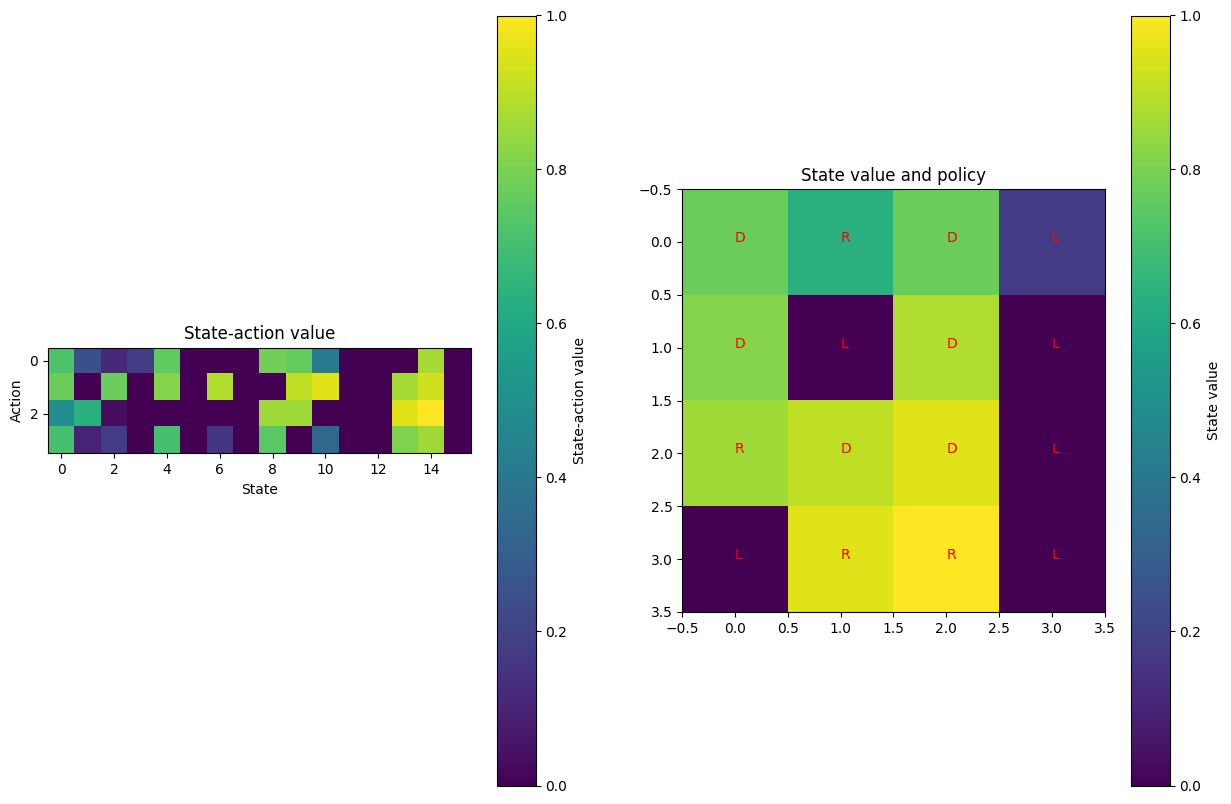

In [29]:
# plot the value function and policy
plot_value(agent.Q_func, (4,4), p_map) 


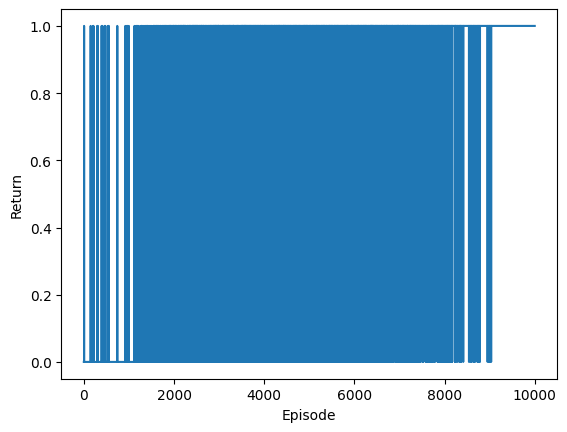

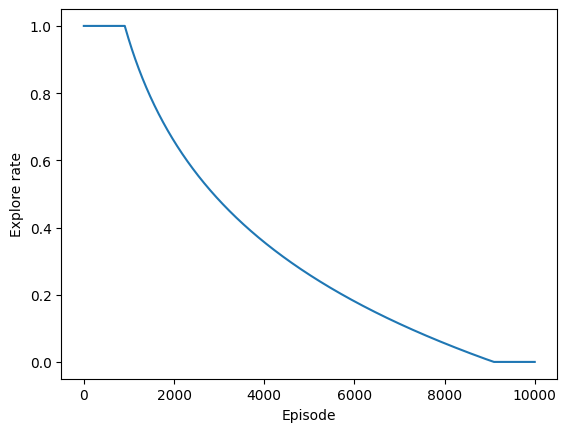

In [30]:
# plot returns and explore rate 
plot_returns(returns)
plot_explore(agent.get_explore_rate, n_episodes)

### Extension: 

- Try and solve one of the other toy text environments from OpenAIgym (https://www.gymlibrary.dev/environments/toy_text/) using Q learning or SARSA. 

In [38]:
gym.make("Blackjack-v1")
agent = SARSA_agent(n_states, n_actions)
n_episodes = 10001
print('TRAINING')
returns = train_agent(agent, env, n_episodes = n_episodes, explore_rate = 0.05) # train the agent

<OrderEnforcing<BlackjackEnv<Blackjack-v1>>>

In [40]:
# train the agent 
env = gym.make("Blackjack-v1", natural=False, sab=False)
env.render_mode = 'human'

# ******* Your code here *******
# Fill in these variables, look at the OpenAIGym documentation to find the correct values 
n_states = 64
n_actions = 15

#p_map = {0:'L', 1:'D', 2:'R', 3:'U'}

agent = Q_agent(n_states, n_actions)
n_episodes = 50001

print('TRAINING')
returns = train_agent(agent, env, n_episodes = n_episodes, explore_rate = 0.05) # train the agent

TRAINING


ValueError: attempt to get argmax of an empty sequence

In [ ]:
!pip install gym[atari,accept-rom-license]==0.21.0
import gym
import gym_blackjack_v1 as bj
env = gym.make('Blackjack-v1')
agent = bj.BasicStrategyAgent(env)
stats = bj.simulate(agent, env)
dict(zip(stats.data, stats.weights / stats.sum_weights)), stats.mean, stats.tconfint_mean()